Classification of soybean genotypes in drought and saline stress environment using Decision Tree algorithm

Classify the samples as belonging to the control or stress group (Drought, Saline). Such a model will make it possible to identify whether the plant has suffered any type of stress such as drought or excess salt.


In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
'''
Read data and Create dataset
'''
df = pd.read_csv('data_classification.csv')

y = np.array(df['CLASS'])
Cultivar = np.array(df['CULTIVAR'])
del df['CLASS']
del df['CULTIVAR']
X = np.array(df, dtype=np.float32)

In [20]:
df.shape

(552, 7)

In [21]:
df.isnull().sum()

GERM    0
SL      0
RL      0
TL      0
SDM     0
RDM     0
TDM     0
dtype: int64

In [22]:
'''
Check the best parameters
Extracted cross-validation was used to prevent a sample of the same genotype from being in both the training set and the test set.
'''
param_grid = { "max_depth": [3, 5, 7],
               "max_features": [1, 3, 5, 7],
               "learning_rate": [0.01, 0.1, 0.2],
               "n_estimators": [50, 100, 200]}
gb_classifier = GradientBoostingClassifier()

group_kfold = GroupKFold(n_splits=10)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = GridSearchCV(gb_classifier, param_grid, cv = 10, scoring='accuracy')
  clf.fit(X_train, y_train)

  print(clf.best_params_)
  print(clf.best_score_)

  K = K + 1

Fold 1
{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 1, 'n_estimators': 50}
0.9675102040816326
Fold 2
{'learning_rate': 0.01, 'max_depth': 7, 'max_features': 1, 'n_estimators': 50}
0.9653877551020408
Fold 3
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 200}
0.9511836734693876
Fold 4
{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 1, 'n_estimators': 100}
0.9614285714285714
Fold 5
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 1, 'n_estimators': 200}
0.9593877551020407
Fold 6
{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 1, 'n_estimators': 50}
0.953265306122449
Fold 7
{'learning_rate': 0.2, 'max_depth': 5, 'max_features': 1, 'n_estimators': 200}
0.9561960784313726
Fold 8
{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 1, 'n_estimators': 50}
0.9581960784313726
Fold 9
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 50}
0.9542352941176471
Fold 10
{'learning_rate': 0.2, 'max_depth': 7, 'max_feature

In [23]:
'''
Random Forest with fixed parameter, over 10-fold, using the measures of accuracy, precision and recall and confusion matrix
'''
K = 1

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

train_indices = []
test_indices  = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)
  
  clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, max_features= 1, learning_rate=0.2, random_state=0)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  r_pr_train = precision_score(y_train, y_pred_train, average='weighted')
  r_pr_test  = precision_score(y_test, y_pred_test, average='weighted')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = recall_score(y_train, y_pred_train, average='weighted')
  r_re_test  = recall_score(y_test, y_pred_test, average='weighted')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('\t Training: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test )

print('\n')
print('Average - Training')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_train.mean(), pr_train.mean(), re_train.mean()))
print('Average - Test')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_test.mean(), pr_test.mean(), re_test.mean()))

Fold 1
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9167 - Pr: 0.9183 - Re: 0.9167
Fold 2
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9167 - Pr: 0.9333 - Re: 0.9167
Fold 3
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 4
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9167 - Pr: 0.9173 - Re: 0.9167
Fold 5
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9333 - Pr: 0.9360 - Re: 0.9333
Fold 6
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9667 - Pr: 0.9667 - Re: 0.9667
Fold 7
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 8
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9583 - Pr: 0.9630 - Re: 0.9583
Fold 9
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.9792 - Pr: 0.9804 - Re: 0.9792
Fold 10
	 Training:

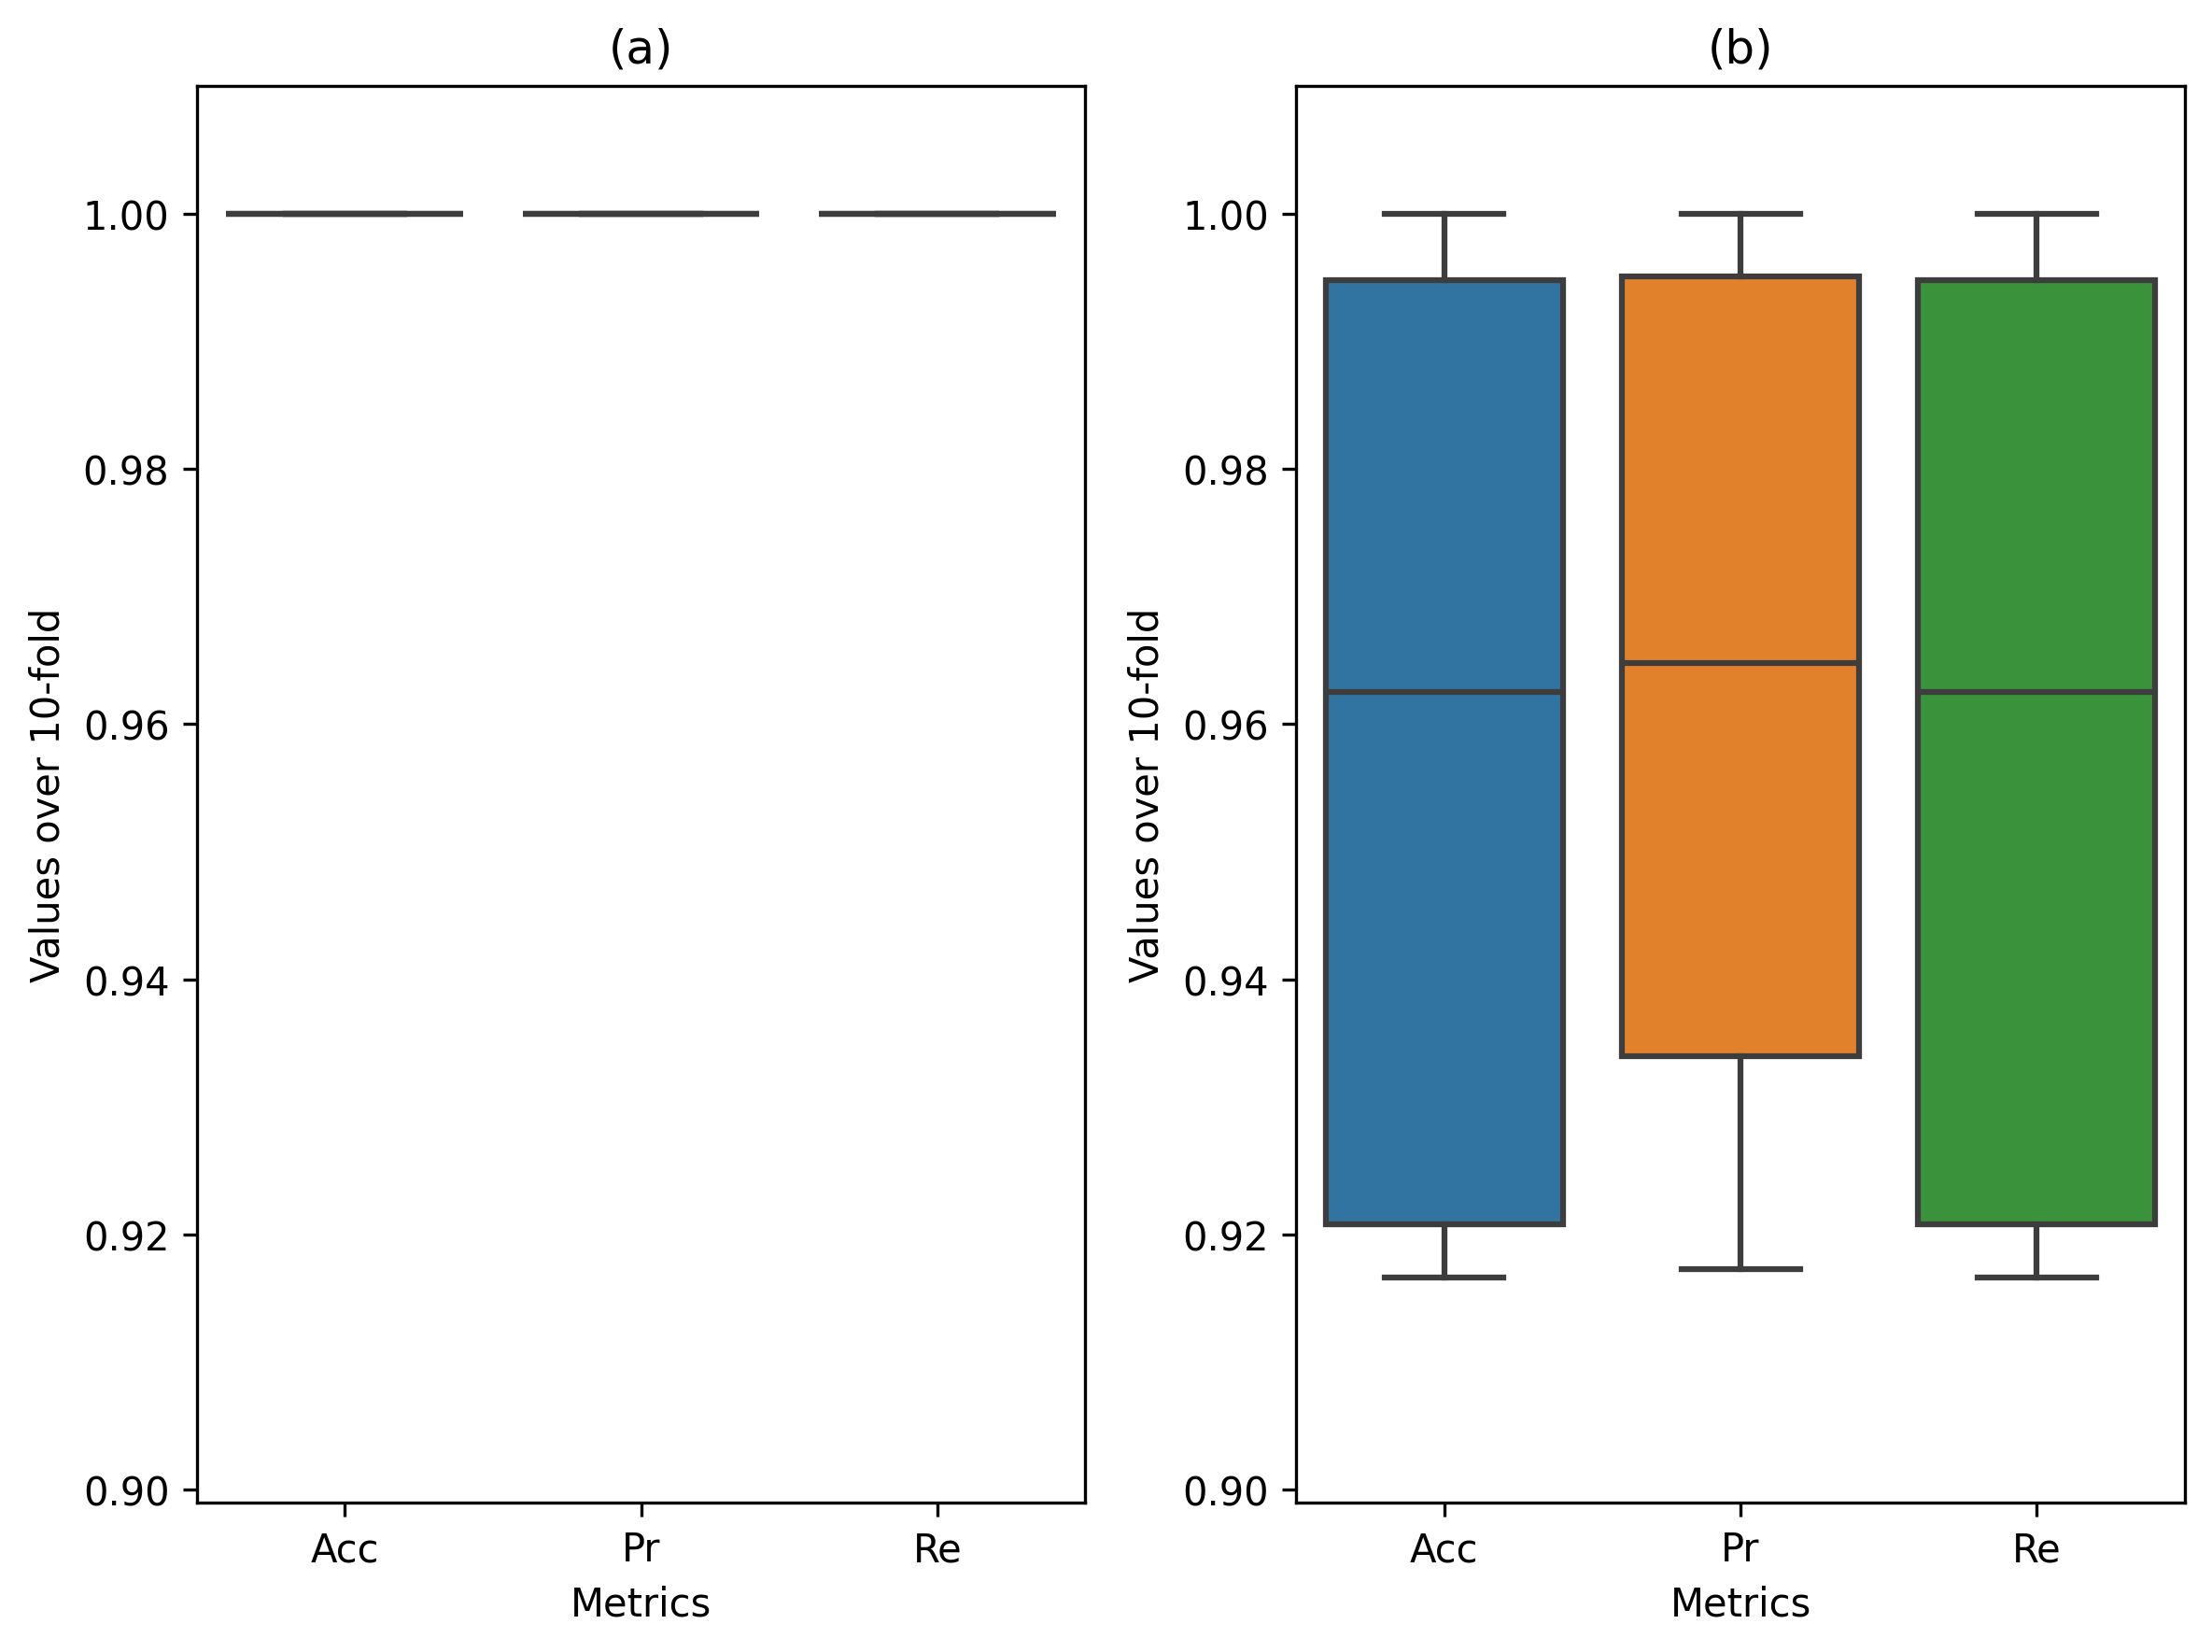

In [24]:
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['Re']  = re_train

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['Re']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.tight_layout()
plt.show()

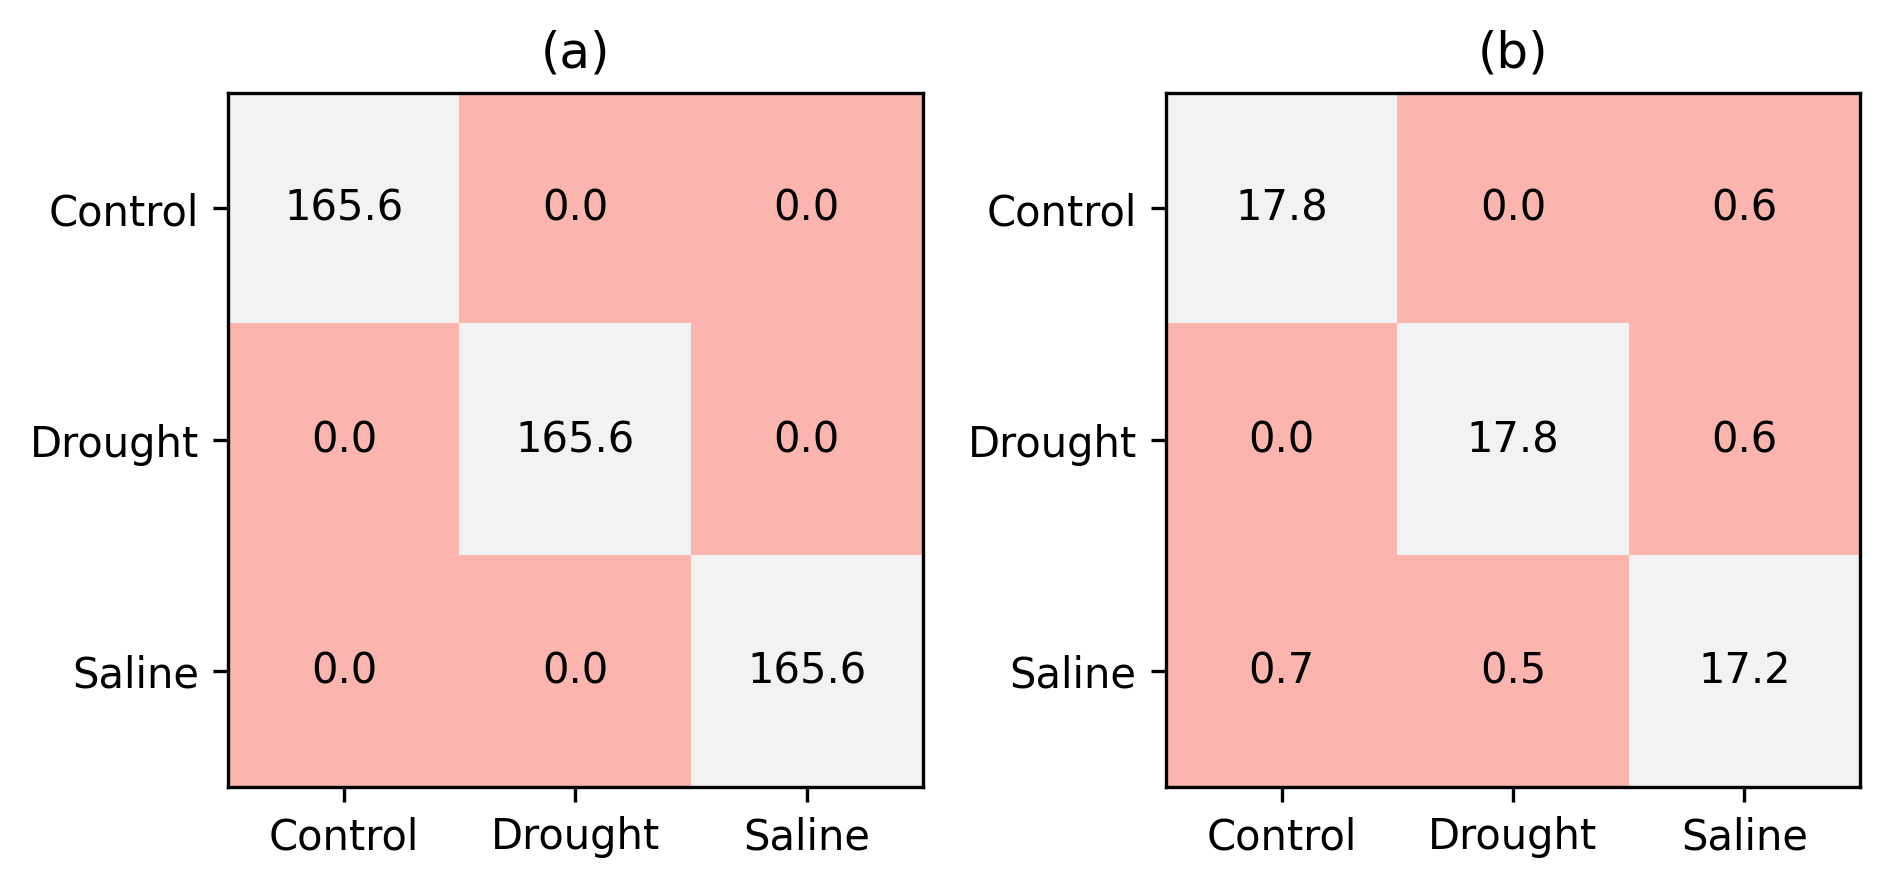

In [25]:
'''
Plot the average confusion matrix
'''
classes = ["Control", "Drought", "Saline"]

MC_train = np.mean(mc_train, axis=0)
MC_test  = np.mean(mc_test, axis=0)

fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel1')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel1')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

In [26]:
single_data_point = {
    'GERM': 96,
    'SL': 7.5,
    'RL': 8.5,
    'TL': 16,
    'SDM': 35.9,
    'RDM': 21.2,
    'TDM': 57.1
}

input_data_single = pd.DataFrame([single_data_point])
prediction_single = clf.predict(input_data_single)

print("Predicted Class:", prediction_single[0])


Predicted Class: Control


c:\Users\Happy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [27]:
'''
Checks which cultivars generate the most prediction errors
'''

Cultivars_errs_train = []
Cultivars_errs_test = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, max_features= 1, learning_rate=0.2, random_state=0)
  clf.fit(X_train, y_train)

  for i, x_train in enumerate(X_train):
    y_pred_train = clf.predict(x_train.reshape(1, -1))[0]
    if y_pred_train != y_train[i]:
      Cultivars_errs_train.append([Cultivar[train_index[i]], y_train[i], y_pred_train])

  for i, x_test in enumerate(X_test):
    y_pred_test = clf.predict(x_test.reshape(1, -1))[0]
    if y_pred_test != y_test[i]:
      Cultivars_errs_test.append([Cultivar[test_index[i]], y_test[i], y_pred_test])

In [28]:
Cultivares_errs_train_ = []
last_cultivar = None
for cultivar in Cultivars_errs_train:
    if cultivar != last_cultivar:
        Cultivares_errs_train_.append(cultivar)
        last_cultivar = cultivar

# Check if Cultivares_errs_train_ is not empty before accessing its elements
if Cultivares_errs_train_:
    Cultivares_errs_train_ = np.array(Cultivares_errs_train_)
    Cultivares_errs_name_train = list(Cultivares_errs_train_[0])
else:
    Cultivares_errs_name_train = []

Cultivares_errs_test_ = []
last_cultivar = None
for cultivar in Cultivars_errs_test:
    if cultivar != last_cultivar:
        Cultivares_errs_test_.append(cultivar)
        last_cultivar = cultivar

# Check if Cultivares_errs_test_ is not empty before accessing its elements
if Cultivares_errs_test_:
    Cultivares_errs_test_ = np.array(Cultivares_errs_test_)
    Cultivares_errs_name_test = list(Cultivares_errs_test_[:,0])
else:
    Cultivares_errs_name_test = []


In [29]:
print('Cultivars with more prediction errors')

print('> Training')
for cultivar in Cultivares_errs_name_train:
  print(cultivar, ': ', Cultivares_errs_name_train.count(cultivar), ' # ', end='')

print('\n> Test')
for cultivar in Cultivares_errs_name_test:
  print(cultivar, ': ', Cultivares_errs_name_test.count(cultivar), ' # ', end='')

Cultivars with more prediction errors
> Training

> Test
5D 6215 IPRO :  1  # M7110 IPRO  :  1  # PONTA IPRO :  1  # 5D 615 RR :  1  # CD 238 RR :  1  # NS 7338 IPRO :  1  # FPS solimoes RR :  1  # AS 3575 IPRO :  1  # DESAFIO RR :  2  # DESAFIO RR :  2  # NS 6909 IPRO :  1  # FPS Paranapanema RR :  1  # RK 6813 RR :  1  # NS 5151 IPRO :  1  # 

In [30]:
'''
Features importance
Show boxplot for folds
'''
importances = []

group_kfold = GroupKFold(n_splits=10)

K = 1
for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, max_features= 1, learning_rate=0.2, random_state=0)
  clf.fit(X_train, y_train)
  imp = clf.feature_importances_
  print(imp)
  importances.append(clf.feature_importances_)
  K = K + 1


Fold 1


[0.03804469 0.24643527 0.06622418 0.20515792 0.2908586  0.02294052
 0.13033882]
Fold 2
[0.03892995 0.25656013 0.06334075 0.20513275 0.2860571  0.02010253
 0.1298768 ]
Fold 3
[0.04038949 0.25818527 0.06377559 0.20912704 0.27994008 0.02448539
 0.12409715]
Fold 4
[0.04141642 0.26206931 0.0595044  0.21383827 0.27772743 0.02320163
 0.12224254]
Fold 5
[0.04122384 0.26124524 0.06393454 0.2152287  0.27444146 0.0242156
 0.11971062]
Fold 6
[0.03951348 0.25989541 0.0592419  0.21087856 0.27901162 0.02566675
 0.12579227]
Fold 7
[0.04098344 0.2507278  0.06749217 0.21422376 0.26775586 0.02118321
 0.13763377]
Fold 8
[0.04183603 0.25775696 0.0647084  0.20375423 0.27935267 0.02645978
 0.12613193]
Fold 9
[0.04180304 0.26162746 0.06283997 0.20659322 0.27665194 0.02474178
 0.12574258]
Fold 10
[0.04478925 0.26798894 0.06368944 0.20692214 0.27124253 0.02150636
 0.12386135]


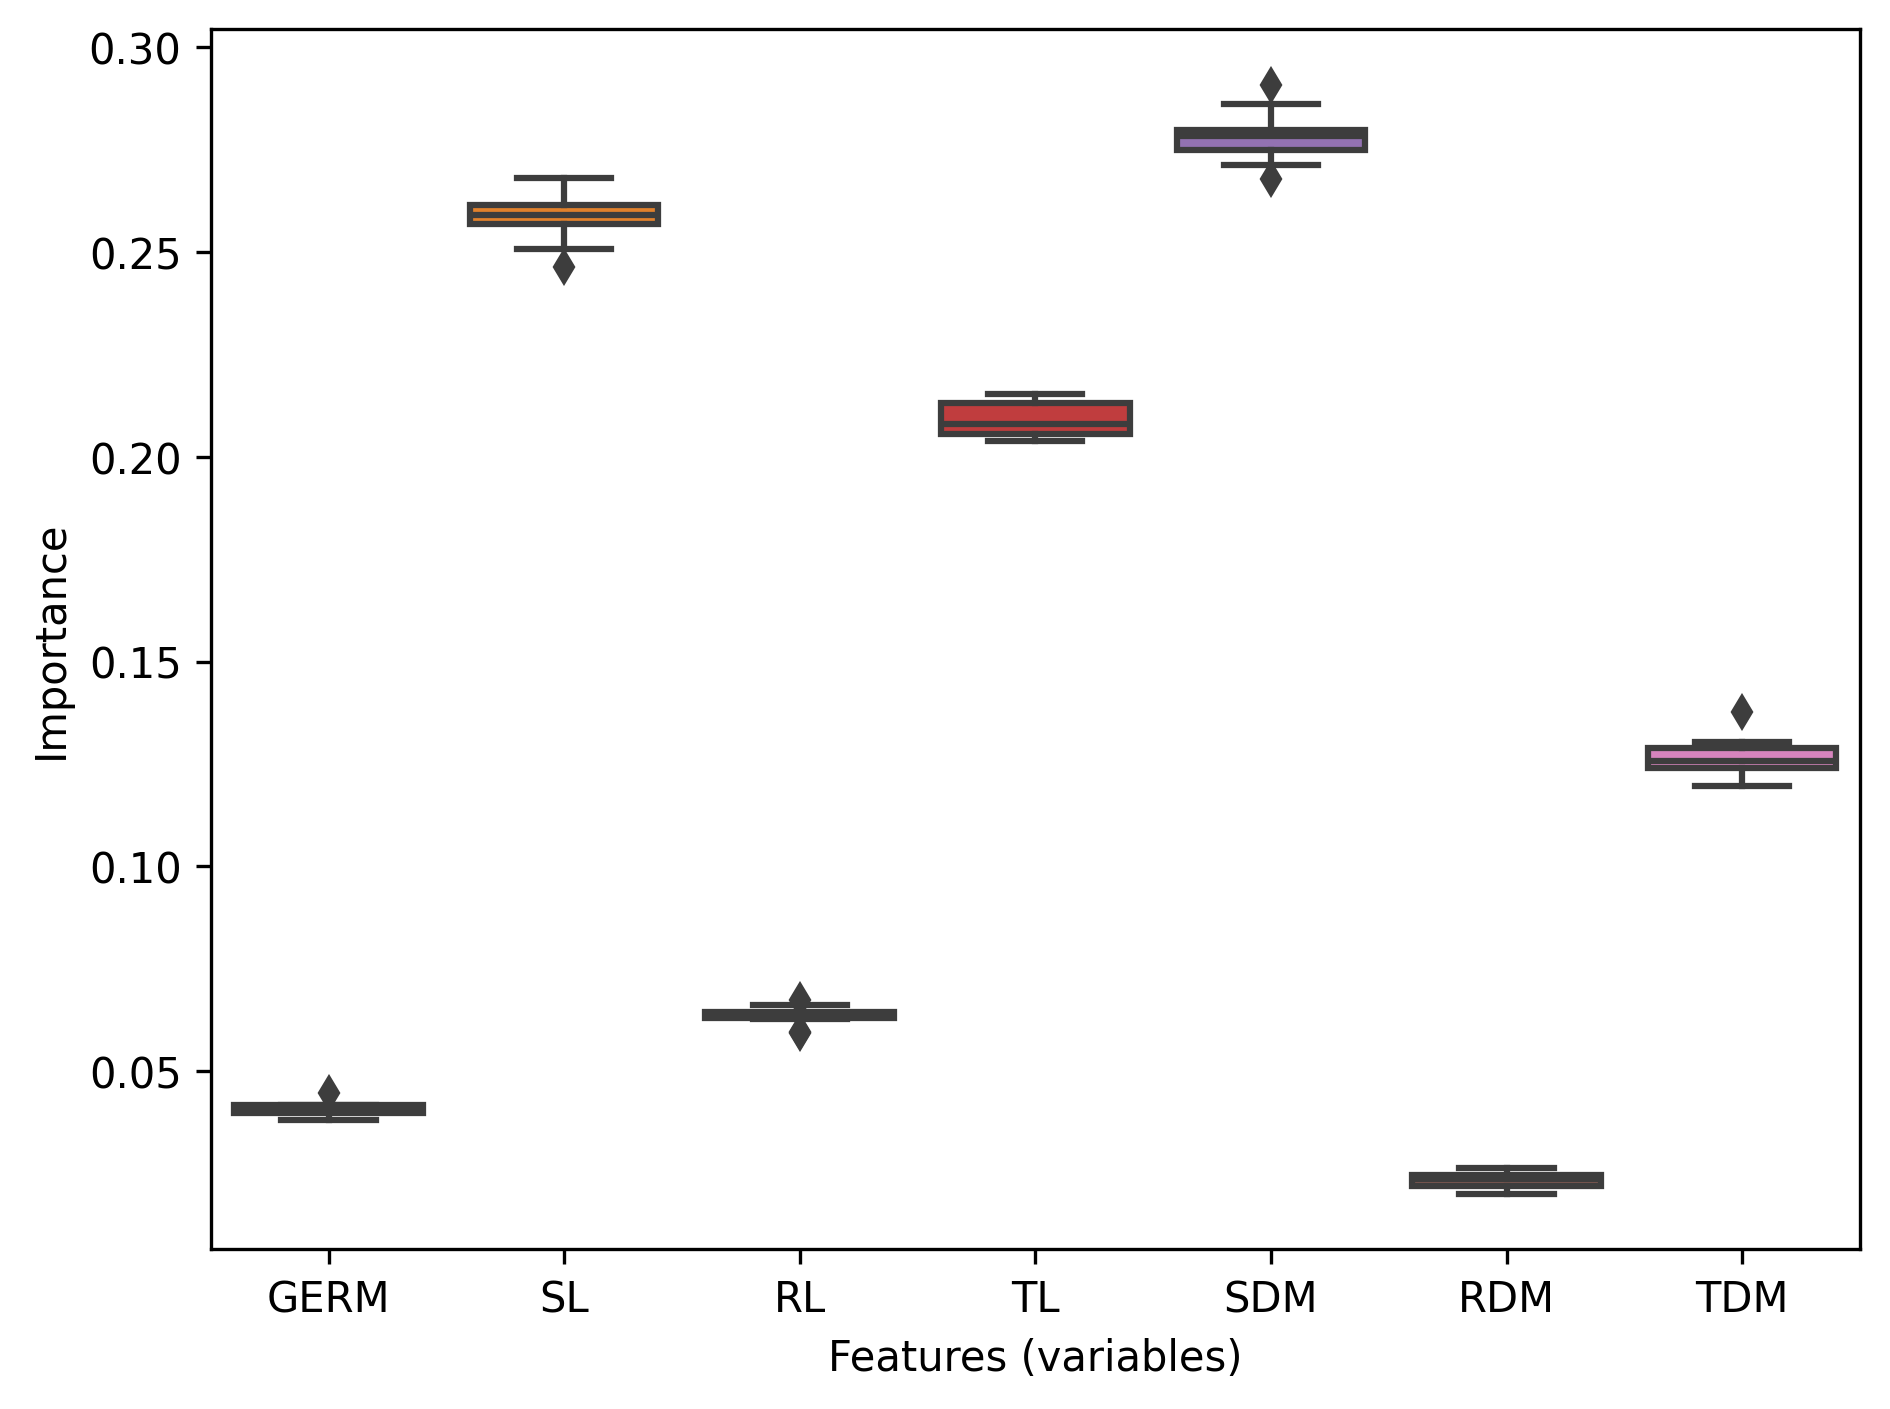

,GERM,SL,RL,TL,SDM,RDM,TDM
0,0.038045,0.246435,0.066224,0.205158,0.290859,0.022941,0.130339
1,0.038930,0.256560,0.063341,0.205133,0.286057,0.020103,0.129877
2,0.040389,0.258185,0.063776,0.209127,0.279940,0.024485,0.124097
3,0.041416,0.262069,0.059504,0.213838,0.277727,0.023202,0.122243
4,0.041224,0.261245,0.063935,0.215229,0.274441,0.024216,0.119711
5,0.039513,0.259895,0.059242,0.210879,0.279012,0.025667,0.125792
6,0.040983,0.250728,0.067492,0.214224,0.267756,0.021183,0.137634
7,0.041836,0.257757,0.064708,0.203754,0.279353,0.026460,0.126132
8,0.041803,0.261627,0.062840,0.206593,0.276652,0.024742,0.125743
9,0.044789,0.267989,0.063689,0.206922,0.271243,0.021506,0.123861


In [31]:
importances = np.array(importances)
df = pd.DataFrame()
df['GERM'] = importances[:,0]
df['SL']   = importances[:,1]
df['RL']   = importances[:,2]
df['TL']   = importances[:,3]
df['SDM']  = importances[:,4]
df['RDM']  = importances[:,5]
df['TDM']  = importances[:,6]

plt.figure(dpi=300)
sns.boxplot(data=df)
plt.xlabel('Features (variables)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

display(df)